In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math
import os, glob

import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
data = pd.read_csv('train_dataframe.csv')
data.head()

,video_name,frame_index,target_id,x_min,y_min,x_max,y_max,score,class,truncation,occlusion,object_size,height,width
0,uav0000013_00000_v,1,0,593,43,767,233,0,0,0,0,33060,756,1344
1,uav0000013_00000_v,2,0,592,43,766,232,0,0,0,0,32886,756,1344
2,uav0000013_00000_v,3,0,592,43,766,232,0,0,0,0,32886,756,1344
3,uav0000013_00000_v,4,0,592,43,766,232,0,0,0,0,32886,756,1344
4,uav0000013_00000_v,5,0,592,43,766,232,0,0,0,0,32886,756,1344


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169359 entries, 0 to 1169358
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   video_name   1169359 non-null  object
 1   frame_index  1169359 non-null  int64 
 2   target_id    1169359 non-null  int64 
 3   x_min        1169359 non-null  int64 
 4   y_min        1169359 non-null  int64 
 5   x_max        1169359 non-null  int64 
 6   y_max        1169359 non-null  int64 
 7   score        1169359 non-null  int64 
 8   class        1169359 non-null  int64 
 9   truncation   1169359 non-null  int64 
 10  occlusion    1169359 non-null  int64 
 11  object_size  1169359 non-null  int64 
 12  height       1169359 non-null  int64 
 13  width        1169359 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 124.9+ MB


|항목| 설명 |
|:--:|:--|
|video_name|비디오 폴더, 비디오 영상 이름|
|frame_index | 해당 영상의 프레임 번호 |
|shape | 이미지의 shape ( height , width, channel ) |
|target_id| 해당 객체에 부여된 번호, 매 영상마다 0부터 시작|
| xywh | Bounding Box의 좌상단점 좌표 x,y와 그때의 너비와 높이 |
|norm_xywh | Bounding Box의 좌표를 이미지의 크기로 정규화 |
|object_size| 원본 이미지상 Bounding Box의 넓이 |
|norm_object_size| 정규화된 Bounding Box의 넓이 |
|score | Bounding Box의 신뢰도 |
|class| 객체의 클래스 정보 |
|unified_class| 배경, 차량, 보행자로 통합된 클래스 정보 |
|truncation| 객체가 이미지 밖에 나간 정도 0(전혀 안나감), 1(많이 나감) |
|occlusion| 객체가 가려진 정도 0(전혀 가려지지 않음), 1(조금 가려짐), 2(많이 가려짐) |

In [7]:
class_name_dict = {
    0:"background",
    1:"pedestrian",
    2:"people",
    3:"bicycle",
    4:"car",
    5:"van",
    6:"truck",
    7:"tricycle",
    8:"awning-tricycle",
    9:"bus",
    10:"motor",
    11:"others"
}

In [8]:
# class 번호를 이름으로 변경
data["class"] = data["class"].apply(lambda x : class_name_dict[x])

In [11]:
i

'background'

In [10]:
from EDA import get_sample_by_class
root_path = 'D:visdrone/VisDrone2019-MOT-train/sequences/'

for i in class_name_dict.values():
    get_sample_by_class(data, i, root_path=root_path, count=5, padding=3, random_state=29)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


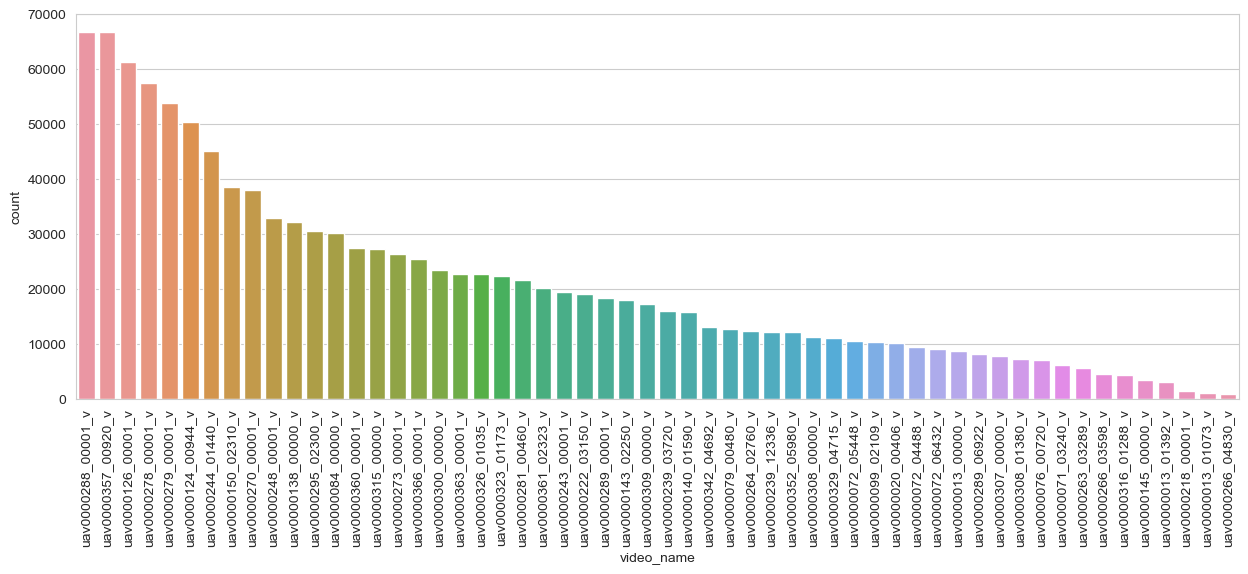

In [18]:
plt.figure(figsize=(15, 5))
sns.countplot(x="video_name", data=data, order = data['video_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

* 영상별 객체의 개수는 일정하지 않고 큰 편차로 나타나는 것을 볼 수 있음

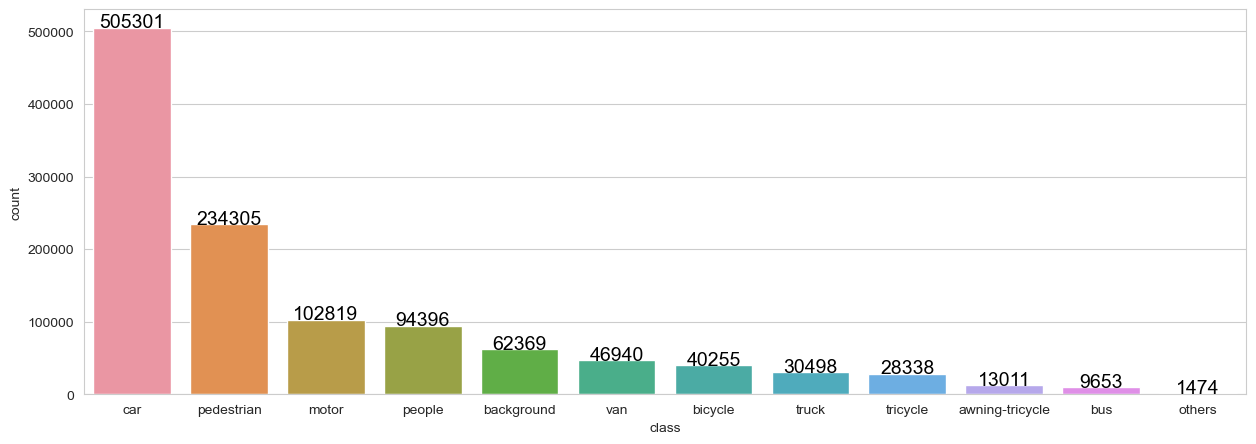

In [37]:
plt.figure(figsize=(15, 5))
g = sns.countplot(x="class", data=data, order = data['class'].value_counts().index)

index = 0
for value in data['class'].value_counts().values:
    g.text(index, value +5 ,str(value), color='#000', size=14, ha="center")
    index += 1
plt.show()

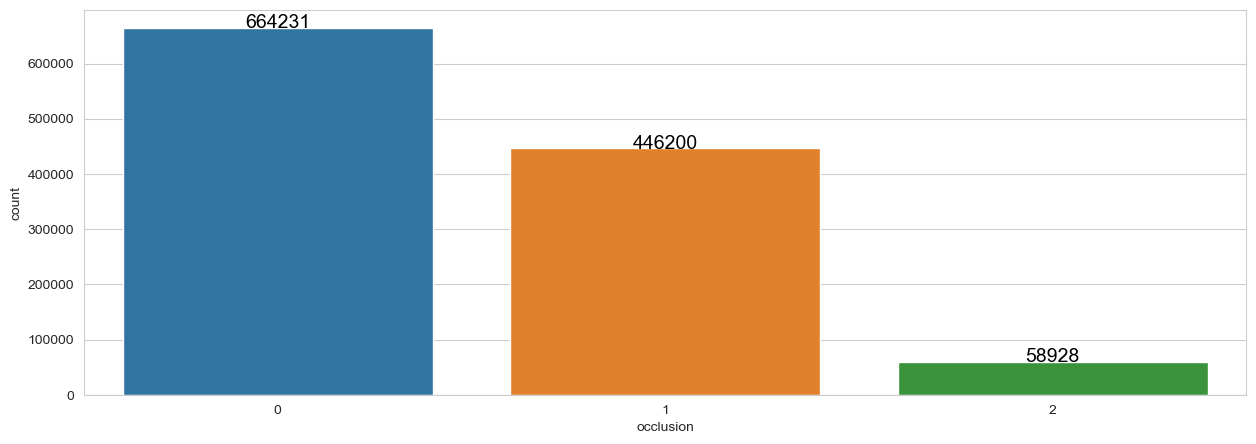

In [40]:
plt.figure(figsize=(15, 5))
g = sns.countplot(x="occlusion", data=data, order = data['occlusion'].value_counts().index)

index = 0
for value in data['occlusion'].value_counts().values:
    g.text(index, value +5 ,str(value), color='#000', size=14, ha="center")
    index += 1
plt.show()

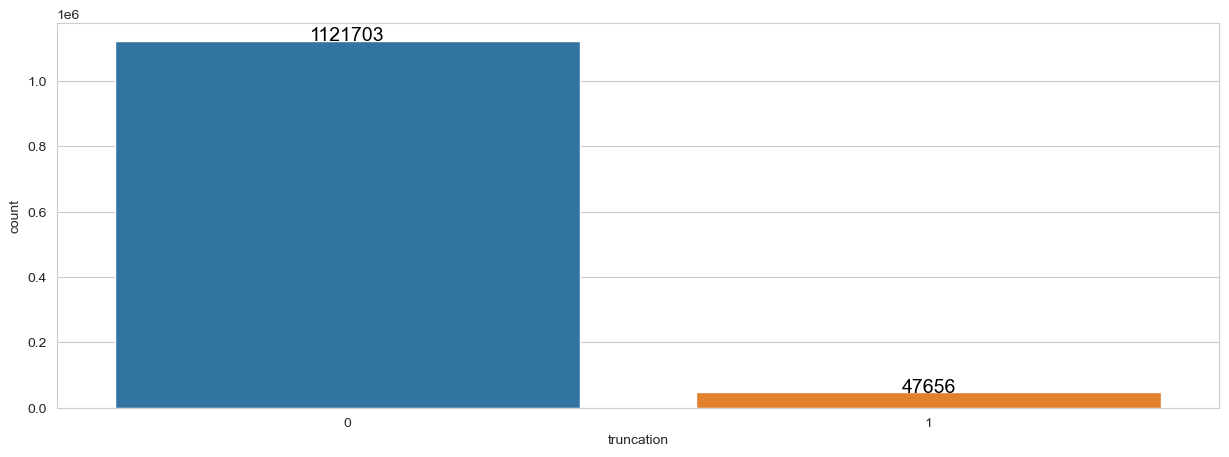

In [41]:
plt.figure(figsize=(15, 5))
g = sns.countplot(x="truncation", data=data, order = data['truncation'].value_counts().index)

index = 0
for value in data['truncation'].value_counts().values:
    g.text(index, value +5 ,str(value), color='#000', size=14, ha="center")
    index += 1
plt.show()

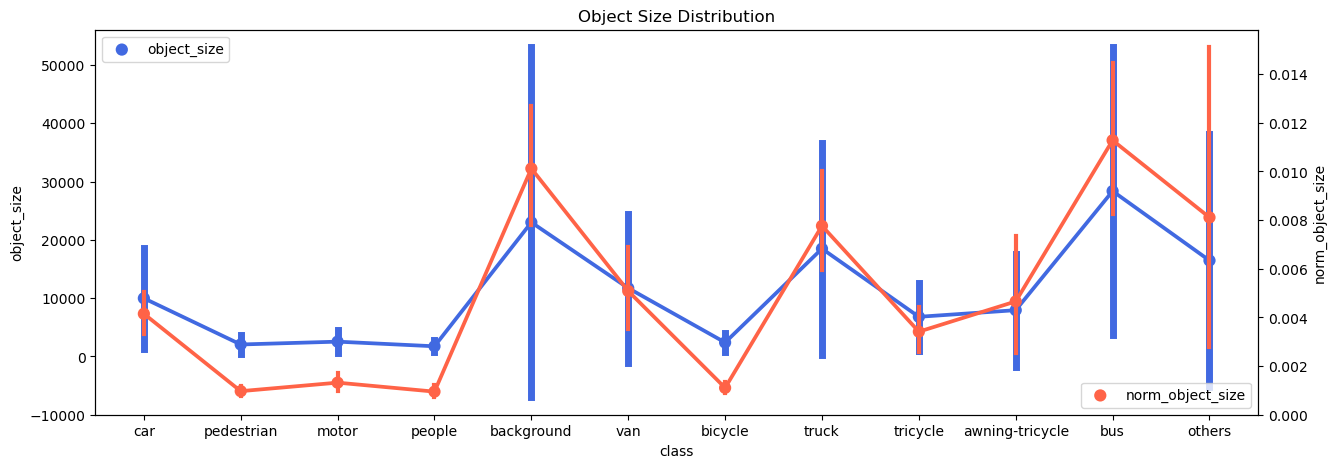

In [173]:
plt.figure(figsize=(15, 5))
plt.style.use(["default"])
ax = plt.subplot(1, 1, 1)
# ax축에 그래프 그리기
ax = sns.pointplot(data=temp,
                   x="class",
                   y="object_size",
                   order=data['class'].value_counts().index,
                   ax=ax,
                   errorbar="sd",
                   color="royalblue",
                   label="object_size",
                   errwidth=5)
plt.legend(loc=2)
# ax2축에 포인트 플랏그리기
ax2 = ax.twinx()
ax2 = sns.pointplot(data=temp,
                    x="class",
                    y="norm_object_size",
                    order=data['class'].value_counts().index,
                    errorbar="ci",
                    color="tomato",
                    label="norm_object_size",
                    errwidth=3)
ax.set_title("Object Size Distribution")  # 타이틀 설정

plt.legend(loc=4)
plt.show()

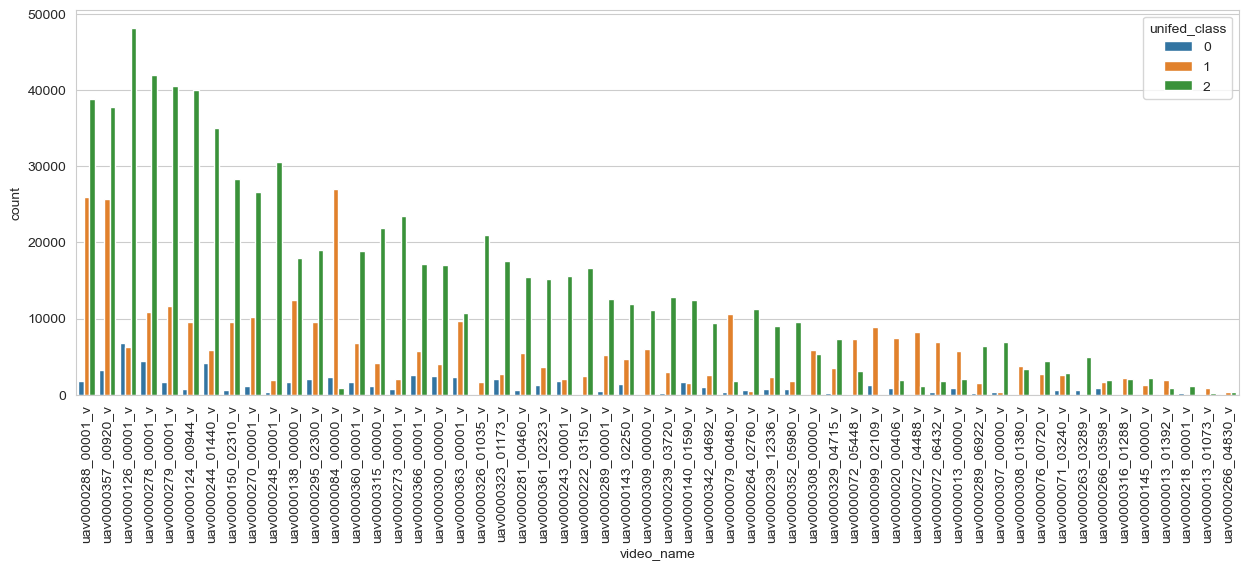

In [176]:
plt.figure(figsize=(15, 5))
sns.countplot(x="video_name", data=data, order = data['video_name'].value_counts().index, hue="unifed_class")
plt.xticks(rotation=90)
plt.show()

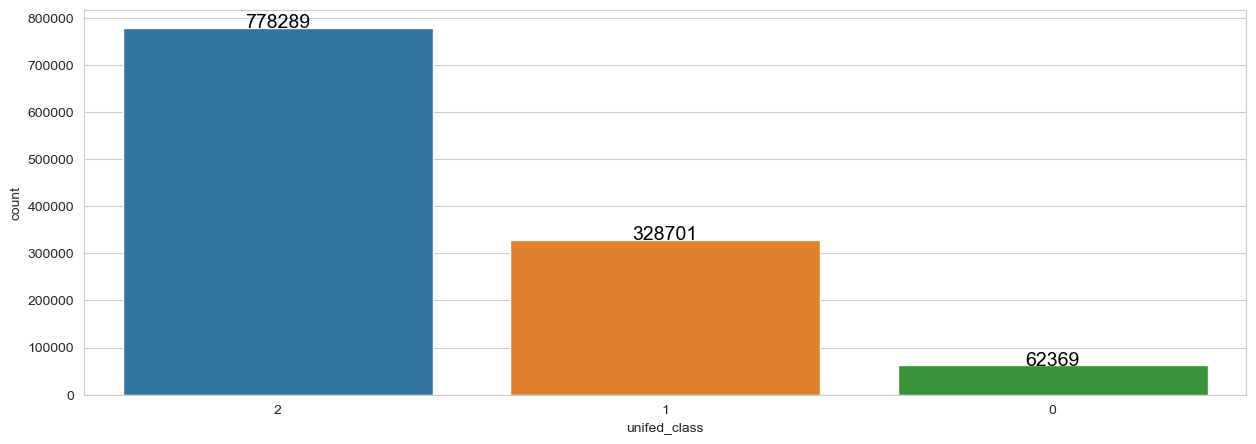

In [178]:
plt.figure(figsize=(15, 5))
g = sns.countplot(x="unifed_class", data=data, order = data['unifed_class'].value_counts().index)

index = 0
for value in data['unifed_class'].value_counts().values:
    g.text(index, value +5 ,str(value), color='#000', size=14, ha="center")
    index += 1
plt.show()